In [102]:
#importing all the required libraries
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn.model_selection import train_test_split
import pickle
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

In [103]:
#Load the dataset
df=pd.read_csv('loan_prediction.csv')
df.head()

,Unnamed: 0,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
0,0,22.0,female,Master,71948.0,0,RENT,35000.0,PERSONAL,16.02,0.49,3.0,561,No,1
1,2,25.0,female,High School,12438.0,3,MORTGAGE,5500.0,MEDICAL,12.87,0.44,3.0,635,No,1
2,3,23.0,female,Bachelor,79753.0,0,RENT,35000.0,MEDICAL,15.23,0.44,2.0,675,No,1
3,4,24.0,male,Master,66135.0,1,RENT,35000.0,MEDICAL,14.27,0.53,4.0,586,No,1
4,5,21.0,female,High School,12951.0,0,OWN,2500.0,VENTURE,7.14,0.19,2.0,532,No,1


In [104]:
#dropping the unnamed column
df=df.drop('Unnamed: 0',axis=1)

In [105]:
#getting information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22000 entries, 0 to 21999
Data columns (total 14 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   person_age                      22000 non-null  float64
 1   person_gender                   22000 non-null  object 
 2   person_education                22000 non-null  object 
 3   person_income                   22000 non-null  float64
 4   person_emp_exp                  22000 non-null  int64  
 5   person_home_ownership           22000 non-null  object 
 6   loan_amnt                       22000 non-null  float64
 7   loan_intent                     22000 non-null  object 
 8   loan_int_rate                   22000 non-null  float64
 9   loan_percent_income             22000 non-null  float64
 10  cb_person_cred_hist_length      22000 non-null  float64
 11  credit_score                    22000 non-null  int64  
 12  previous_loan_defaults_on_file  

In [106]:
#Checking if the dataset is balanced
df['loan_status'].value_counts()

loan_status
0    12000
1    10000
Name: count, dtype: int64

In [107]:
#cleaning age column
df[df['person_age']>100]

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
9297,144.0,female,Associate,7200766.0,124,MORTGAGE,5000.0,PERSONAL,12.73,0.0,25.0,850,No,0
14930,116.0,male,Bachelor,5545545.0,93,MORTGAGE,3823.0,VENTURE,12.15,0.0,24.0,708,No,0
15113,109.0,male,High School,5556399.0,85,MORTGAGE,6195.0,VENTURE,12.58,0.0,22.0,792,No,0


In [108]:
df[df['person_age']<=0]

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status


In [109]:
df=df[df['person_age']<=100]

<Axes: ylabel='person_age'>

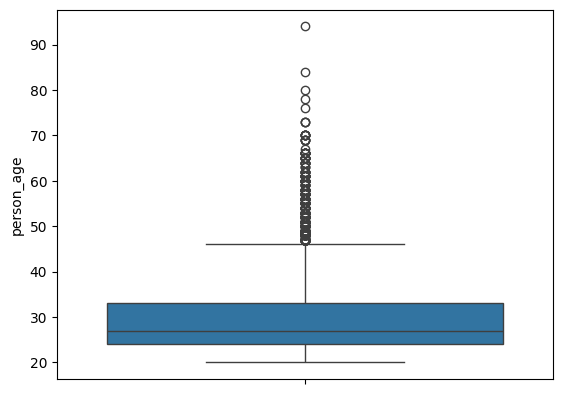

In [110]:
#chceking outliers for person_age
sns.boxplot(y='person_age',data=df)

<Axes: ylabel='person_income'>

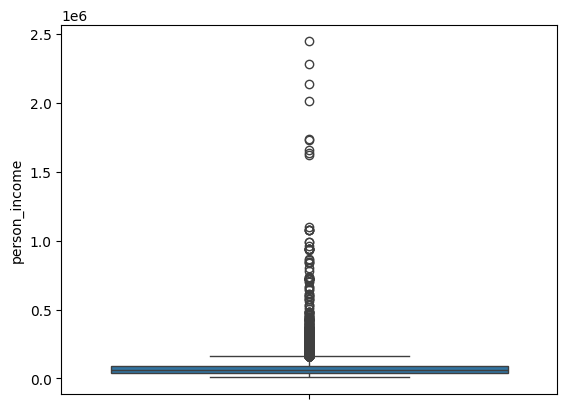

In [111]:
#checking outliers for person_income
sns.boxplot(y='person_income',data=df)

In [112]:
df.describe()

,person_age,person_income,person_emp_exp,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,loan_status
count,21997.000000,2.199700e+04,21997.000000,21997.000000,21997.000000,21997.000000,21997.000000,21997.000000,21997.000000
mean,29.258490,7.512687e+04,6.733327,9952.679775,11.549953,0.158124,6.899714,633.827386,0.454607
std,7.124086,6.918483e+04,7.175773,6561.095247,3.026160,0.097791,4.587666,50.857061,0.497947
min,20.000000,8.000000e+03,0.000000,563.000000,5.420000,0.000000,2.000000,418.000000,0.000000
25%,24.000000,4.286500e+04,1.000000,5000.000000,9.450000,0.080000,3.000000,602.000000,0.000000
50%,27.000000,6.213000e+04,4.000000,8400.000000,11.230000,0.140000,5.000000,640.000000,0.000000
75%,33.000000,8.965500e+04,10.000000,13650.000000,13.640000,0.220000,9.000000,671.000000,1.000000
max,94.000000,2.448661e+06,76.000000,35000.000000,20.000000,0.630000,30.000000,784.000000,1.000000


<Axes: ylabel='credit_score'>

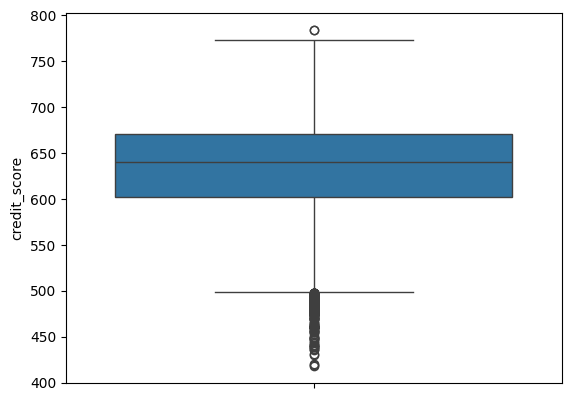

In [113]:
#checking outliers in credit_score
sns.boxplot(y='credit_score',data=df)

<Axes: ylabel='credit_score'>

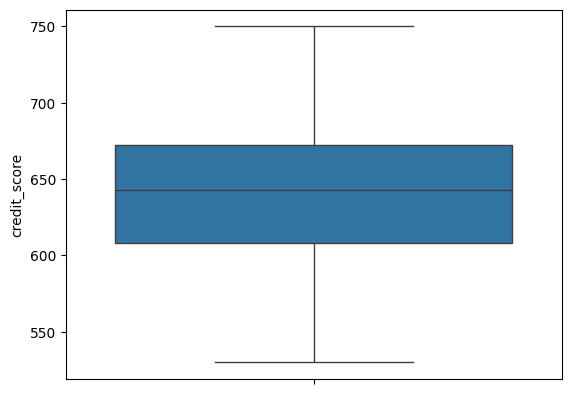

In [114]:
df=df[(df['credit_score']>=530)&(df['credit_score']<=750)]
sns.boxplot(y='credit_score',data=df)

In [115]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 21182 entries, 0 to 21999
Data columns (total 14 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   person_age                      21182 non-null  float64
 1   person_gender                   21182 non-null  object 
 2   person_education                21182 non-null  object 
 3   person_income                   21182 non-null  float64
 4   person_emp_exp                  21182 non-null  int64  
 5   person_home_ownership           21182 non-null  object 
 6   loan_amnt                       21182 non-null  float64
 7   loan_intent                     21182 non-null  object 
 8   loan_int_rate                   21182 non-null  float64
 9   loan_percent_income             21182 non-null  float64
 10  cb_person_cred_hist_length      21182 non-null  float64
 11  credit_score                    21182 non-null  int64  
 12  previous_loan_defaults_on_file  21182

In [116]:
df.to_csv('cleaned_str.csv')

In [117]:
from sklearn.preprocessing import LabelEncoder
obj=LabelEncoder()
for i in df.columns:
    if df[i].dtype==object:
        df[i]=obj.fit_transform(df[i])
df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 21182 entries, 0 to 21999
Data columns (total 14 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   person_age                      21182 non-null  float64
 1   person_gender                   21182 non-null  int64  
 2   person_education                21182 non-null  int64  
 3   person_income                   21182 non-null  float64
 4   person_emp_exp                  21182 non-null  int64  
 5   person_home_ownership           21182 non-null  int64  
 6   loan_amnt                       21182 non-null  float64
 7   loan_intent                     21182 non-null  int64  
 8   loan_int_rate                   21182 non-null  float64
 9   loan_percent_income             21182 non-null  float64
 10  cb_person_cred_hist_length      21182 non-null  float64
 11  credit_score                    21182 non-null  int64  
 12  previous_loan_defaults_on_file  21182

In [118]:
X=df.iloc[:,:-1]
y=df.iloc[:,-1]
Xtrain,Xtest,ytrain,ytest=train_test_split(X,y,test_size=0.3,random_state=42)

In [119]:
model=SVC(kernel='rbf')
model.fit(Xtrain,ytrain)

SVC()

In [120]:
print('training efficiency:',model.score(Xtrain,ytrain))
print('testing efficiency:',model.score(Xtest,ytest))

training efficiency: 0.7130909826667566
testing efficiency: 0.7110936270653029


In [121]:
from sklearn.ensemble import RandomForestClassifier
rfmodel=RandomForestClassifier(n_estimators=150,max_depth=5,random_state=42)
rfmodel.fit(Xtrain,ytrain)

RandomForestClassifier(max_depth=5, n_estimators=150, random_state=42)

In [122]:
print('training efficiency:',rfmodel.score(Xtrain,ytrain))
print('testing efficiency:',rfmodel.score(Xtest,ytest))

training efficiency: 0.8902677547717003
testing efficiency: 0.8856018882769473


In [123]:
with open('rfmodel.pkl','wb') as file:
    pickle.dump(rfmodel,file)